## In_Depth_PCA:

In [24]:
# Importing libraries:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA
%matplotlib inline

## Introducing Principal Component Analysis:

(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

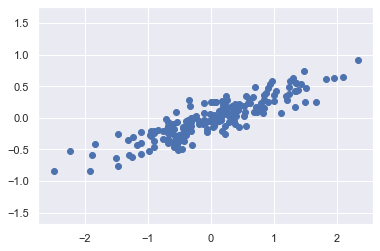

In [52]:
# Exploring the behavior of the PCA:

rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('Equal')

## Mitko learning process:

In [43]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 10)).T

In [44]:
X.shape

(10, 2)

In [45]:
X

array([[-0.45250425, -0.09753763],
       [-0.72409528, -0.11623486],
       [ 1.17757592,  0.34287441],
       [-1.7520709 , -0.33279619],
       [ 0.60342064, -0.0519311 ],
       [-0.94978295, -0.26549226],
       [ 0.16345392,  0.01279908],
       [ 0.31582314,  0.1761755 ],
       [-0.18307177, -0.3325858 ],
       [-0.03455148,  0.34585164]])

## Code continue down:

In [53]:
# Building a PCA model object:

pca = PCA(n_components = 2)

In [54]:
# Fitting the PCA model:

pca.fit(X)

PCA(n_components=2)

In [55]:
# Printing the learned results from PCA model:

pca.components_

array([[-0.94446029, -0.32862557],
       [-0.32862557,  0.94446029]])

In [56]:
# Printing the learned results from PCA model:

pca.explained_variance_

array([0.7625315, 0.0184779])

(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

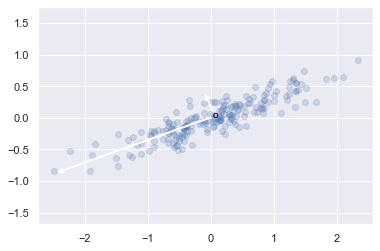

In [57]:
# Building a function to visualize them as vectors ovet the input data:

def draw_vector(v0, v1, ax = None):
    ax = ax or plt.gca()
    arrowprops = dict(arrowstyle = '->',
                      linewidth = 2,
                      shrinkA = 0,
                      shrinkB = 0)
    ax.annotate('o', v1, v0, arrowprops = arrowprops)
    
# Plot data:
plt.scatter(X[:, 0], X[:, 1], alpha = 0.2)
for lenght, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(lenght)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')

## PCA as Dimensional Reduction:

In [58]:
# Using PCA as dimensional reduction:

pca = PCA(n_components = 1)
pca.fit(X)
X_pca = pca.transform(X)

print('Original shape: ', X.shape)
print('Transformed shape: ', X_pca.shape)

Original shape:  (200, 2)
Transformed shape:  (200, 1)


(-2.731158226766438,
 2.6099018832593326,
 -0.9672765706389318,
 1.0060642308539953)

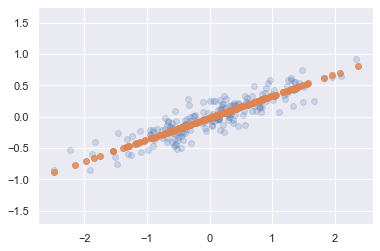

In [59]:
# Now, lets plot together original data along with transformed data (after we inverse it):

X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha = 0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha = 0.8)
plt.axis('equal')

## PCA for Visualization: Handwritten Digits:

In [62]:
# Importing libraries:

from sklearn.datasets import load_digits

In [66]:
# Loading the digits dataset:

digits = load_digits()
digits.data.shape

(1797, 64)

In [69]:
# Reducing the dimensionality of the digits dataset with PCA:

pca = PCA(n_components = 2)
projected = pca.fit_transform(digits.data)

In [70]:
# Inspecting the shapes of the original and projected:

print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


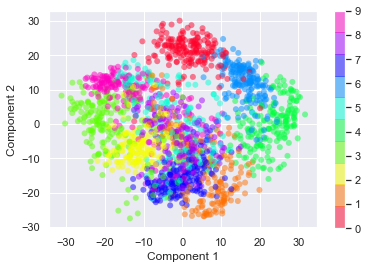

In [72]:
# We can plot the first two principal components of each point to learn about the data:

plt.scatter(projected[:, 0], projected[:, 1],
            c = digits.target,
            edgecolor = 'none',
            alpha = 0.5,
            cmap = plt.get_cmap('gist_rainbow', 10))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar()

## Choosing the Number of Components:

Text(0, 0.5, 'Cumulative Explained Variance')

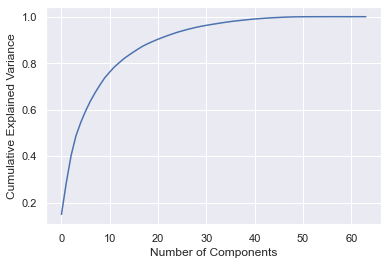

In [73]:
# Choosing the optimal number of components:

pca = PCA()
pca.fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

- This curve quantifies how much of the total, 64-dimensional variance is contained
within the first N components. For example, we see that with the digits the first 10
components contain approximately 75% of the variance, while you need around 50
components to describe close to 100% of the variance.


- Here we see that our two-dimensional projection loses a lot of information (as meas‐
ured by the explained variance) and that we’d need about 20 components to retain
90% of the variance. Looking at this plot for a high-dimensional dataset can help you
understand the level of redundancy present in multiple observations.


## PCA as Noise Filtering:

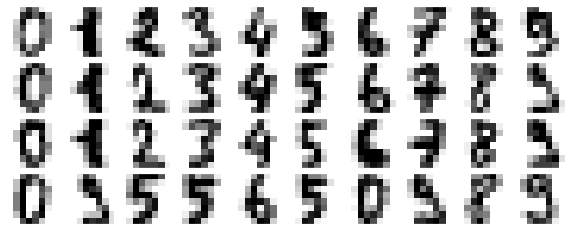

In [77]:
# Plotting digits without noise:

def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize = (10, 4),
                             subplot_kw = {'xticks' : [], 'yticks' : []},
                             gridspec_kw = dict(hspace = 0.1, wspace = 0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap = 'binary',
                  interpolation = 'nearest',
                  clim = (0, 16))
plot_digits(digits.data)

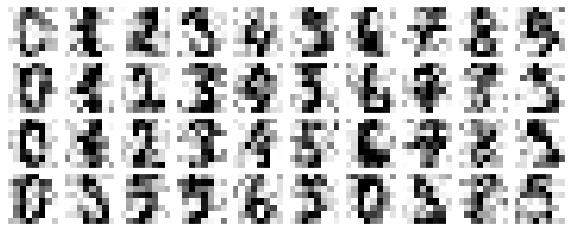

In [78]:
# Now let’s add some random noise to create a noisy dataset, and replot it:

np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

In [80]:
# Training the PCA on the noisy data:

pca = PCA(0.50).fit(noisy)
pca.n_components_

12

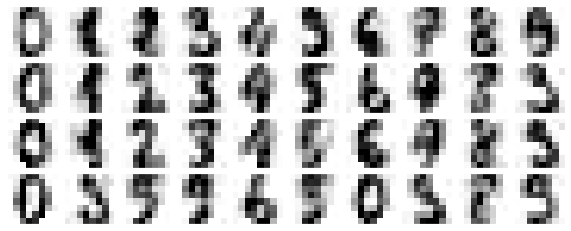

In [81]:
# Plotting the results:

components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

- This signal preserving/noise filtering property makes PCA a very useful feature selec‐
tion routine—for example, rather than training a classifier on very high-dimensional
data, you might instead train the classifier on the lower-dimensional representation,
which will automatically serve to filter out random noise in the inputs.

## Example: Eigenfaces:

In [16]:
# Importing libraries:

from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA as RandomizedPCA

In [12]:
# Inserting the dataset to a variable:

faces = fetch_lfw_people(min_faces_per_person = 60)

# Printing the target_names and images_shape:
for face in faces.target_names:
    print(face)
print()
print(f'Shape of the images is: ', faces.images.shape)

Ariel Sharon
Colin Powell
Donald Rumsfeld
George W Bush
Gerhard Schroeder
Hugo Chavez
Junichiro Koizumi
Tony Blair

Shape of the images is:  (1348, 62, 47)


In [17]:
# Building a RandomizedPCA model object:

pca = RandomizedPCA(n_components = 150, svd_solver='randomized')

In [18]:
# Fitting the RandomizedPCA model:

pca.fit(faces.data)

PCA(n_components=150, svd_solver='randomized')

- In this case, it can be interesting to visualize the images associated with the first several principal components (these components are technically known as “eigenvectors,” so these types of images are often called “eigenfaces”). As you can see in Figure 5-91, they are as creepy as they sound:

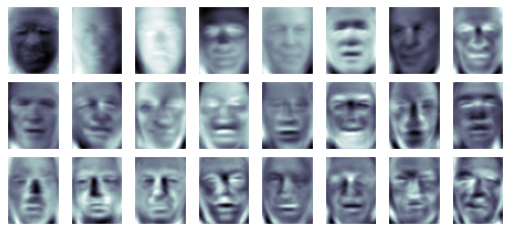

In [27]:
# Plotting the results from the firts several principal components:

fig, axes = plt.subplots(3, 8, figsize = (9, 4),
                        subplot_kw = {'xticks' : [], 'yticks' : []},
                        gridspec_kw = dict(hspace = 0.1, wspace = 0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap = 'bone')

Text(0, 0.5, 'Cumulative Explained Variance')

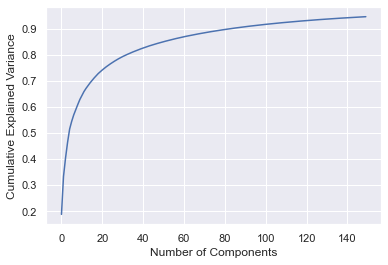

In [28]:
#  Let’s take a look at the cumulative variance of these components to see how much of the data information the projection is preserving:

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [29]:
# Compute the components and projeted faces:

pca = RandomizedPCA(n_components = 150, svd_solver='randomized').fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

Text(0, 0.5, '150-dim\nreconstruction')

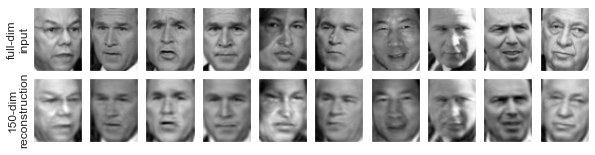

In [41]:
# Plotting the results:

fig, ax = plt.subplots(2, 10, figsize = (10, 2.5),
                         subplot_kw = {'xticks':[], 'yticks':[]},
                         gridspec_kw = dict(hspace = 0.1, wspace = 0.1))
    
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction')

- The top row here shows the input images, while the bottom row shows the recon‐ struction of the images from just 150 of the ~3,000 initial features. This visualization makes clear why the PCA feature selection used in “In-Depth: Support Vector Machines” on page 405 was so successful: although it reduces the dimensionality of the data by nearly a factor of 20, the projected images contain enough information that we might, by eye, recognize the individuals in the image. What this means is that our classification algorithm needs to be trained on 150-dimensional data rather than 3,000-dimensional data, which depending on the particular algorithm we choose, can lead to a much more efficient classification.